In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [2]:
!wget "https://courses.openedu.ru/assets/courseware/v1/89b56add1bf7a894d91790c47992ed86/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/chaffinch-1420407_1280.jpg"

--2023-09-23 17:08:30--  https://courses.openedu.ru/assets/courseware/v1/89b56add1bf7a894d91790c47992ed86/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/chaffinch-1420407_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194520 (190K) [image/jpeg]
Saving to: ‘chaffinch-1420407_1280.jpg’

chaffinch-1420407_1 100%[===================>] 189.96K   489KB/s    in 0.4s    

2023-09-23 17:08:31 (489 KB/s) - ‘chaffinch-1420407_1280.jpg’ saved [194520/194520]



In [3]:
img_name = "chaffinch-1420407_1280.jpg"

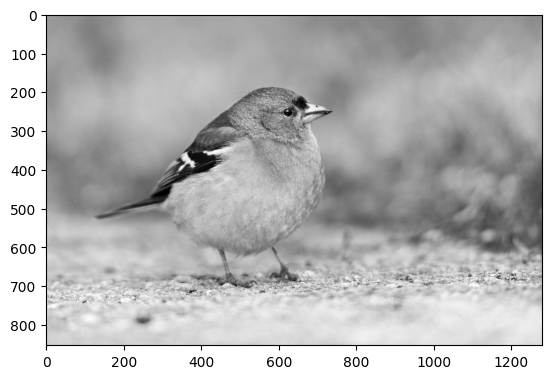

In [5]:
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray");

In [6]:
f = np.fft.fft2(img)

In [7]:
f[84, 1250]

(13282.50020492501-14964.995707963917j)

In [8]:
fshift = np.fft.fftshift(f)

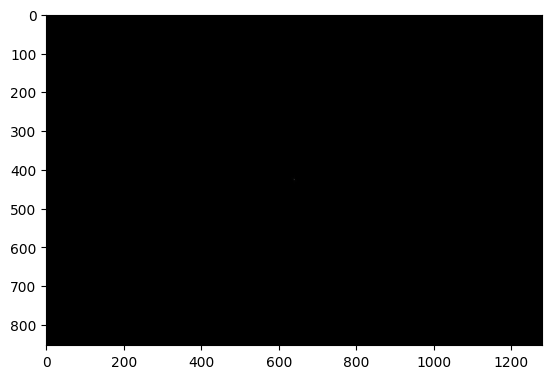

In [9]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray');

In [13]:
print("Min amplitude: ", np.round(np.min(magnitude_spectrum), 2))
print("Max amplitude: ", np.round(np.max(magnitude_spectrum), 2))

Min amplitude:  3.47
Max amplitude:  184179550.0


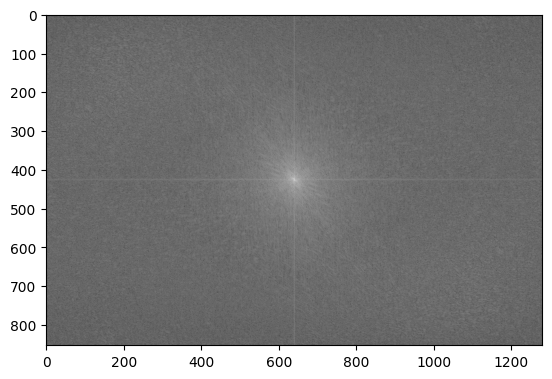

In [15]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray');

In [16]:
np.round(np.max(magnitude_spectrum) - np.min(magnitude_spectrum), 2)

17.54

In [20]:
h, w = magnitude_spectrum.shape

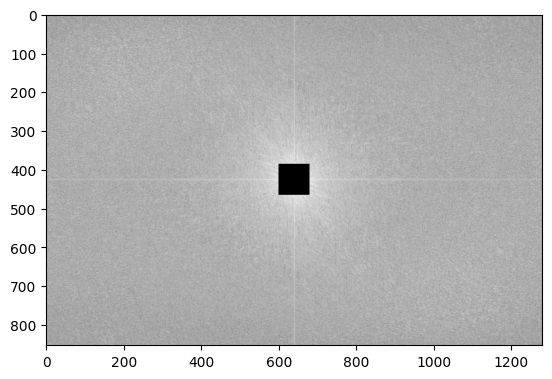

In [21]:
fshift[h // 2 -  40 : h // 2 + 40, w // 2 - 40 : w // 2 + 40] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray');

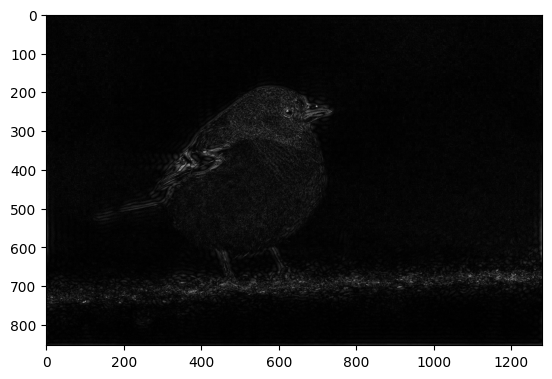

In [22]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray');

In [23]:
img_back[639, 443]

3.510159270148769

In [24]:
!wget "https://courses.openedu.ru/assets/courseware/v1/b9011e32fdcbf88518d7fe143a8fe5e4/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/bird-3158784_1280.jpg"

--2023-09-23 17:23:01--  https://courses.openedu.ru/assets/courseware/v1/b9011e32fdcbf88518d7fe143a8fe5e4/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/bird-3158784_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99021 (97K) [image/jpeg]
Saving to: ‘bird-3158784_1280.jpg’

bird-3158784_1280.j 100%[===================>]  96.70K   335KB/s    in 0.3s    

2023-09-23 17:23:03 (335 KB/s) - ‘bird-3158784_1280.jpg’ saved [99021/99021]



In [25]:
img_name = "bird-3158784_1280.jpg"

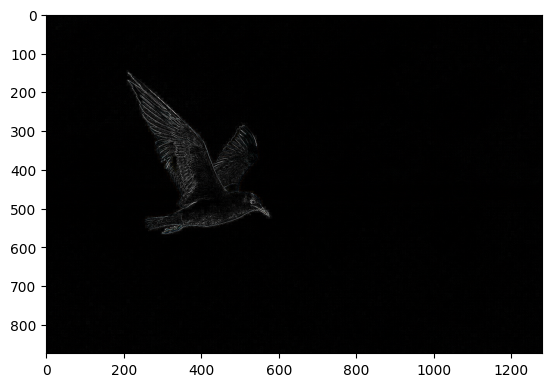

In [36]:
img = cv2.imread(img_name)
laplacian = cv2.Laplacian(img, -1)
plt.imshow(laplacian);

In [35]:
laplacian.sum()

8538378

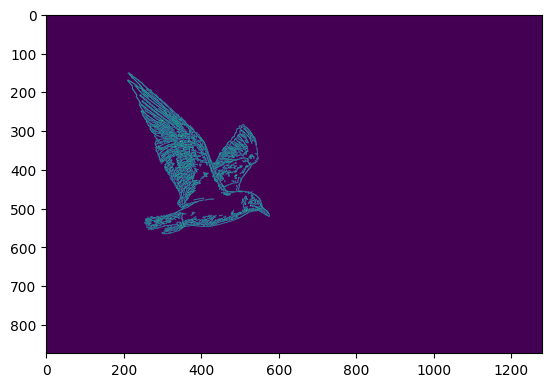

In [37]:
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny);

In [38]:
canny.sum()

3742125